In order for the _differentiable physics_ approach to work, $P$ has to be differentiable. The _differentials_ in the form of a gradient will drive the learning process.

## Finding the inverse function of a parabola

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# X-Data
N = 200
X = np.random.random(N)

In [ ]:
# Generate Y-Data
sign = (- np.ones((N, )))**np.random.randint(2, size=N)
Y = np.sqrt(X) * sign

In [ ]:
# simple NN

act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

# Training
results_sv = nn_sv.fit(X, Y, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: 0.5278
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5108
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5024
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5004
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4996


7/7 [==============================] - 0s 4ms/step


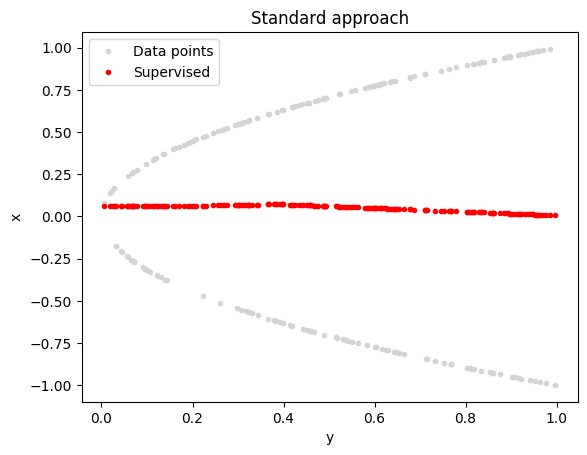

In [ ]:
# Results

plt.plot(X, Y, '.', label='Data points', color="lightgray")
plt.plot(X, nn_sv.predict(X), '.', label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

## A differentiable physics approach